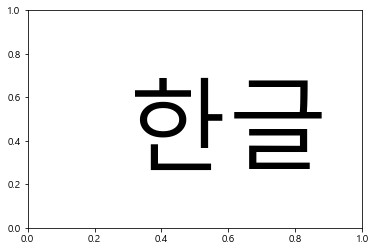

In [1]:
# Import Libraries

import lime
from lime import lime_tabular

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.text(0.3, 0.3, '한글', size=100)
plt.rc('axes',unicode_minus=False)

import numpy as np

import pandas as pd
import shap
shap.initjs()

import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from xgboost import XGBClassifier

In [2]:
# Import data

df = pd.read_excel("Dataset_with SQ.xlsx")
df.head()

,pid,gid,Gender,Age,Number of cars owned,Mileage,Number of students,Policy understanding,Technology understanding,Education level,...,electric,hydrogen,Gu_AB,Status quo vehicle average price,Status Quo 1 vehicle class,Status Quo 1 fuel type,Status Quo 2 vehicle class,Status Quo 2 fuel type,Status Quo 3 vehicle class,Status Quo 3 fuel type
0,31,1,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
1,31,2,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
2,31,3,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
3,31,4,1,31,1,10000,0,3,2,2,...,0,0,2,3000.0,5,1,0,0,0,0
4,31,5,1,31,1,10000,0,3,2,2,...,0,1,2,3000.0,5,1,0,0,0,0


In [3]:
y=df.lca.copy()
display(y.head())

x=df.drop(['choice',
           'Gu_AB',
          'pid',
          'gid',
           'lca',
           'gasoline',
           'diesel',
           'electric',
           'hydrogen',],axis=1)
display(x.head())

0    3
1    3
2    3
3    1
4    4
Name: lca, dtype: int64

,Gender,Age,Number of cars owned,Mileage,Number of students,Policy understanding,Technology understanding,Education level,Household income,Political orientation,...,Hydrogen vehicle class,Hydrogen vehicle fuel cost,Hydrogen vehicle price,Status quo vehicle average price,Status Quo 1 vehicle class,Status Quo 1 fuel type,Status Quo 2 vehicle class,Status Quo 2 fuel type,Status Quo 3 vehicle class,Status Quo 3 fuel type
0,1,31,1,10000,0,3,2,2,580,3,...,2,50,4000,3000.0,5,1,0,0,0,0
1,1,31,1,10000,0,3,2,2,580,3,...,1,150,3000,3000.0,5,1,0,0,0,0
2,1,31,1,10000,0,3,2,2,580,3,...,2,150,5000,3000.0,5,1,0,0,0,0
3,1,31,1,10000,0,3,2,2,580,3,...,1,50,3000,3000.0,5,1,0,0,0,0
4,1,31,1,10000,0,3,2,2,580,3,...,2,50,5000,3000.0,5,1,0,0,0,0


In [4]:
cls=RandomForestClassifier(random_state=42)
#model=XGBClassifier(random_state=42)
cls.fit(x, y)
#cls.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [5]:
explainer=shap.TreeExplainer(cls)
shap_values=explainer.shap_values(x)

In [6]:
class_names = ['Gasoline','Diesel','Electric','Hydrogen']
print(class_names)

['Gasoline', 'Diesel', 'Electric', 'Hydrogen']


In [7]:
print(x.columns)

Index(['Gender', 'Age', 'Number of cars owned', 'Mileage',
       'Number of students', 'Policy understanding',
       'Technology understanding', 'Education level', 'Household income',
       'Political orientation', 'Gasoline refueling infrastructure',
       'Gasoline vehicle class', 'Gasoline vehicle fuel cost',
       'Gasoline vehicle price', 'Diesel refueling infrastructure',
       'Diesel vehicle class', 'Diesel vehicle fuel cost',
       'Diesel vehicle price', 'Electric recharging infrastructure',
       'Electric vehicle class', 'Electric vehicle fuel cost',
       'Electric vehicle price', 'Hydrogen refueling infrastructure',
       'Hydrogen vehicle class', 'Hydrogen vehicle fuel cost',
       'Hydrogen vehicle price', 'Status quo vehicle average price',
       'Status Quo 1 vehicle class', 'Status Quo 1 fuel type',
       'Status Quo 2 vehicle class', 'Status Quo 2 fuel type',
       'Status Quo 3 vehicle class', 'Status Quo 3 fuel type'],
      dtype='object')


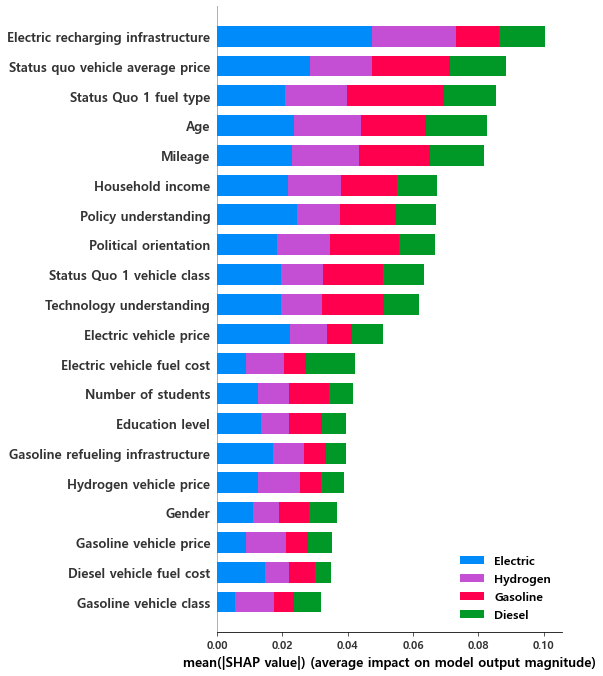

In [8]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
shap.summary_plot(shap_values,x.values,
                  plot_type='bar',
                  class_names=class_names,
                  feature_names=x.columns)

# 결과 분석 - Gasoline

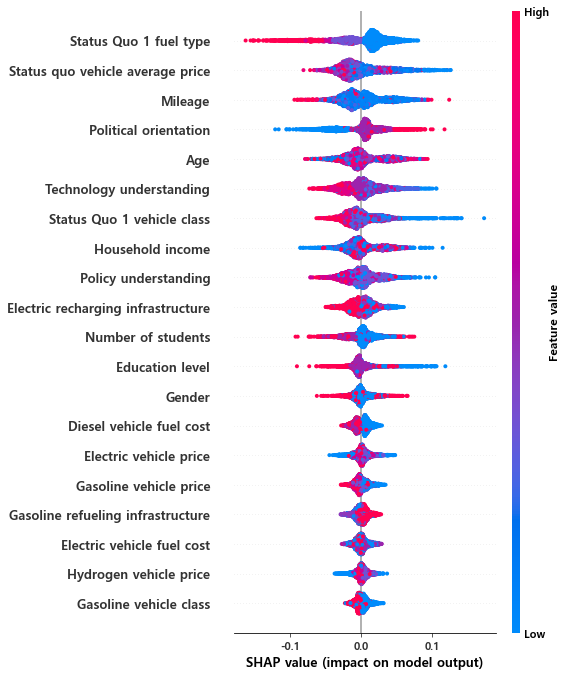

In [9]:
shap.summary_plot(shap_values[0],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

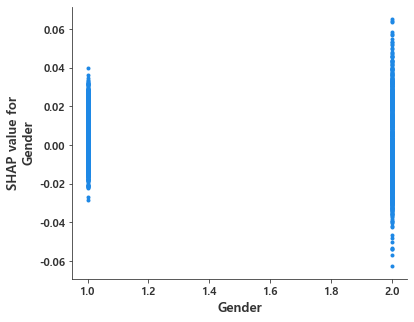

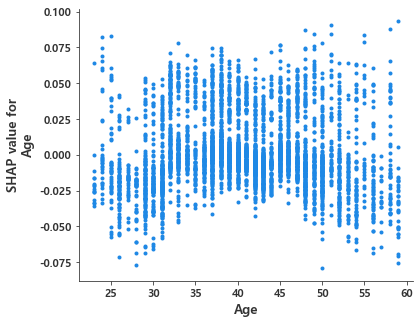

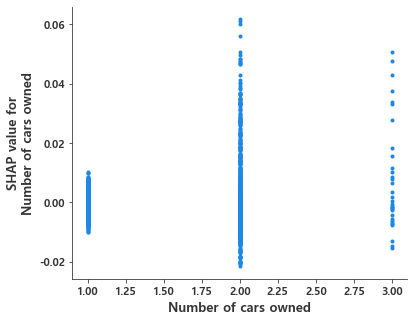

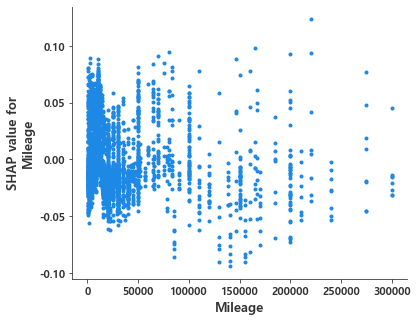

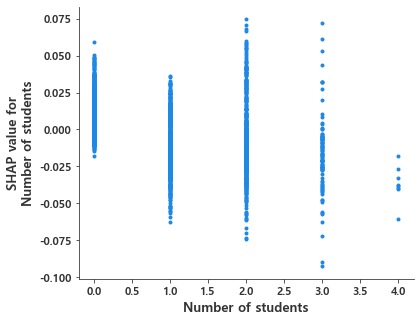

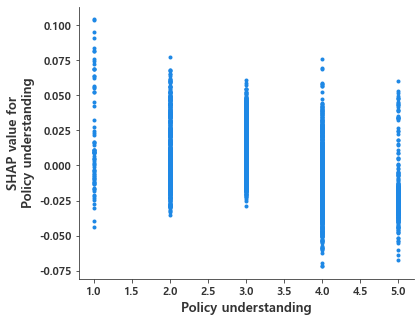

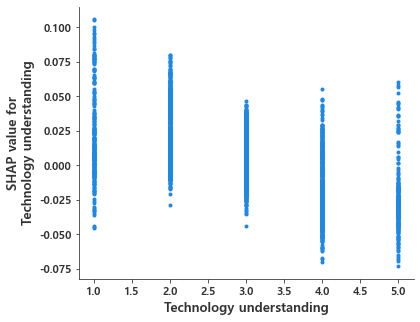

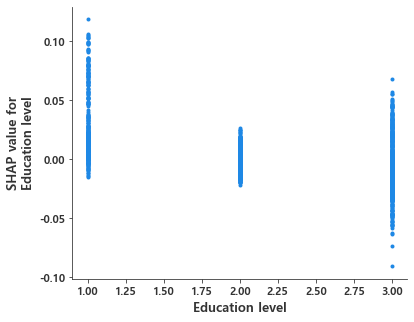

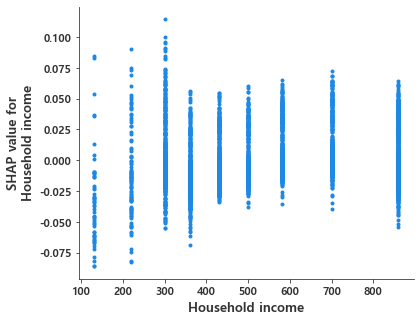

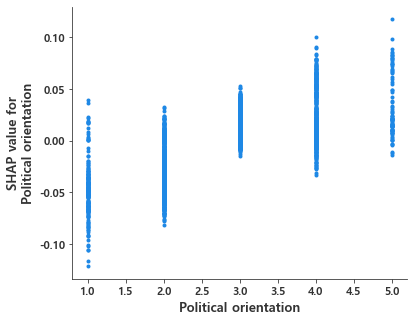

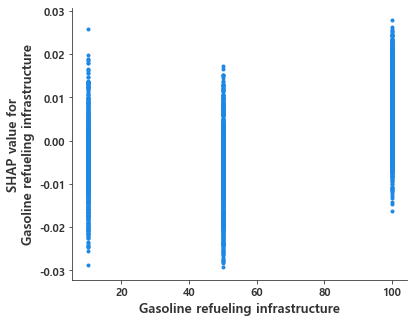

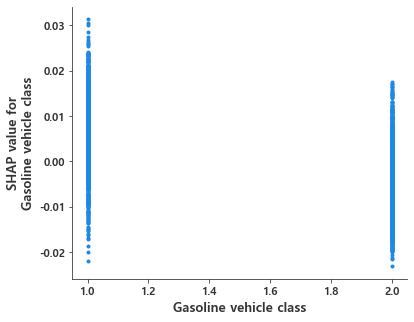

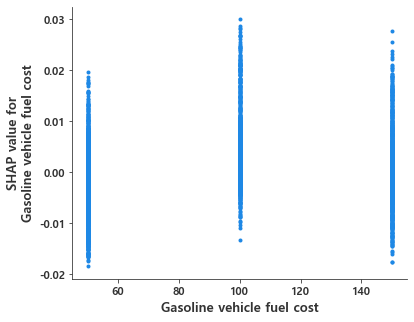

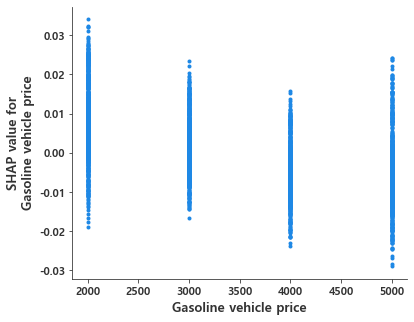

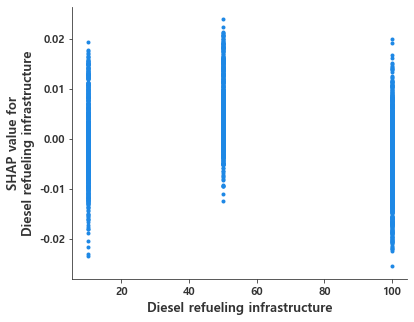

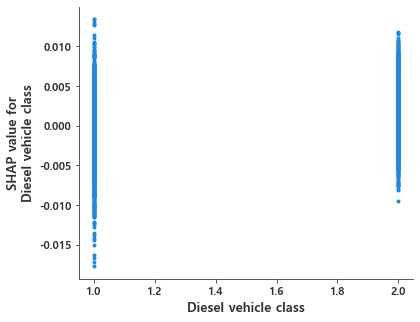

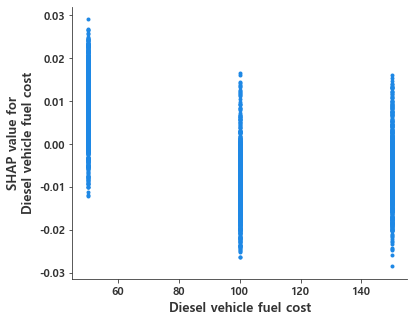

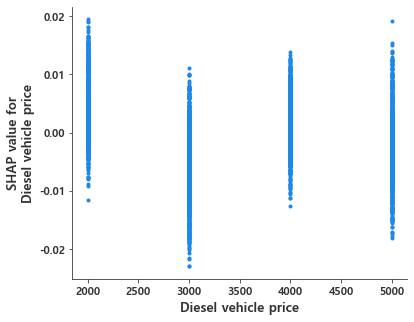

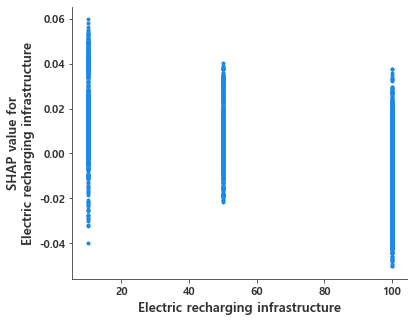

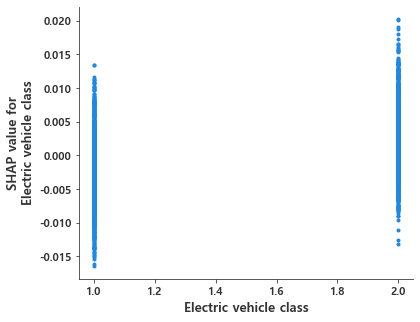

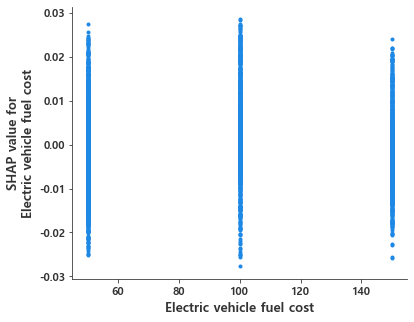

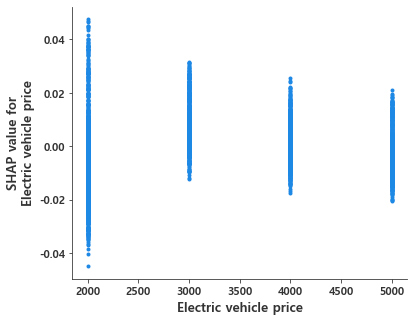

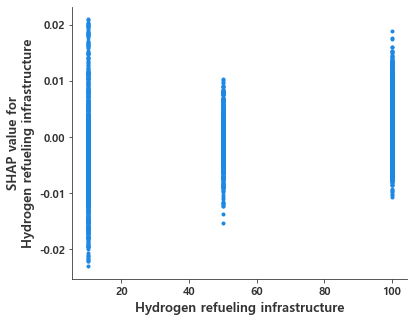

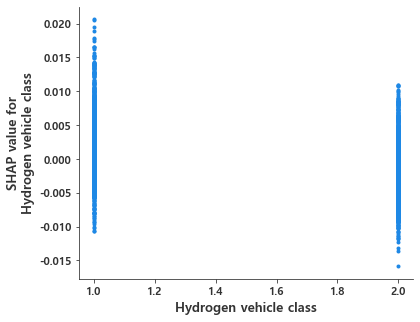

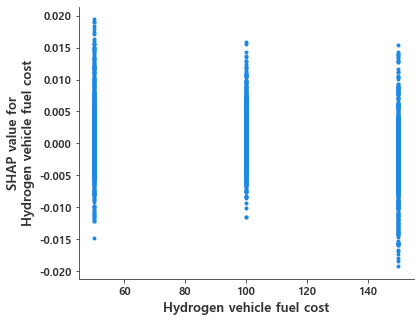

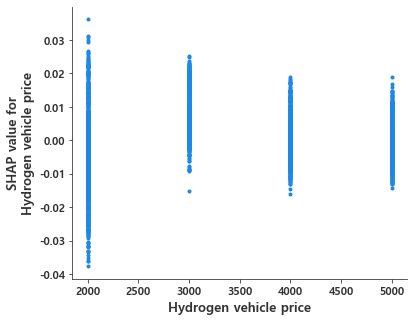

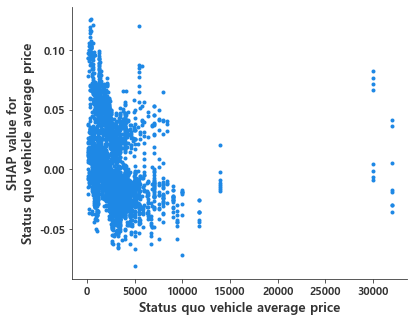

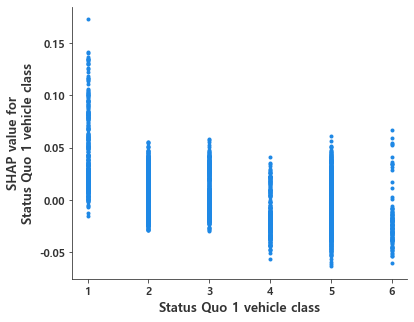

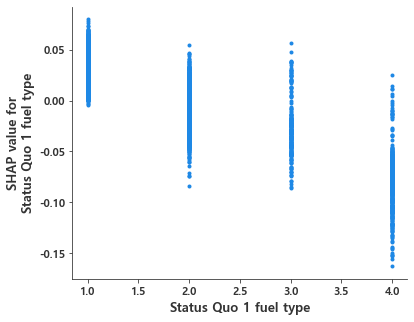

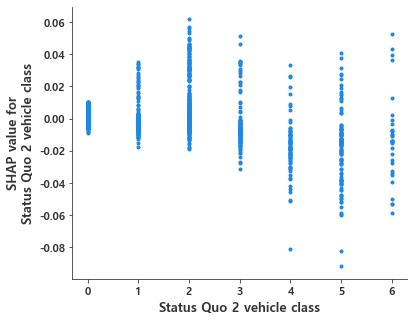

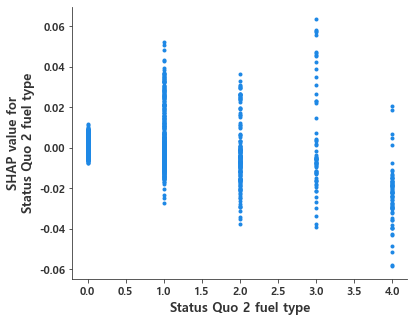

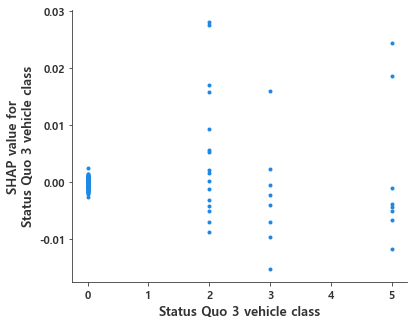

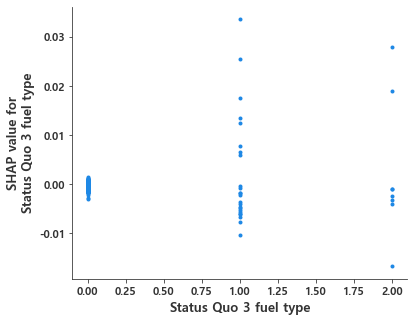

In [10]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
for i in range(0,33,1):
#     fig, ax = plt.subplots(figsize=(6, 5))
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index=None,
                    ax=None)
#     labels = ax.get_xticklabels() + ax.get_yticklabels()
#     [label.set_fontweight('bold') for label in labels]
#     [label.set_fontsize(12) for label in labels]
#     fig.show()

# 결과 분석 - Diesel

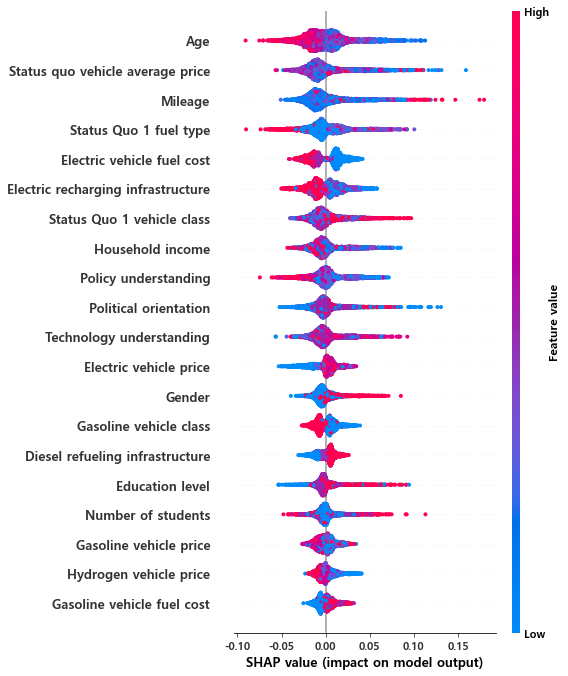

In [11]:
shap.summary_plot(shap_values[1],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

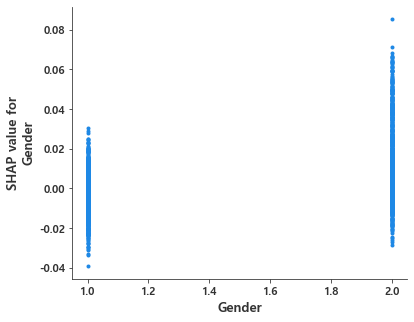

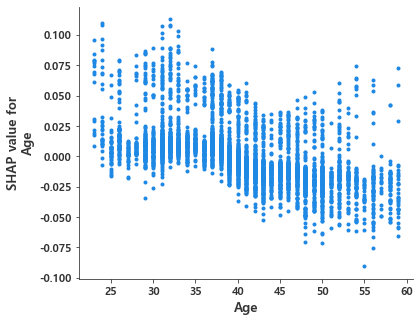

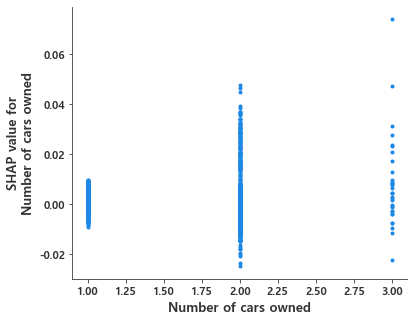

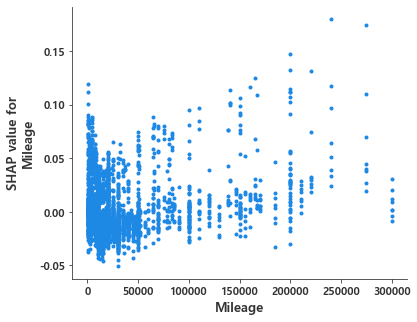

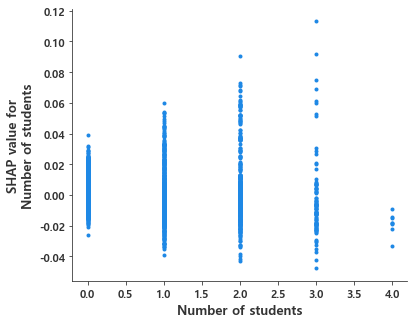

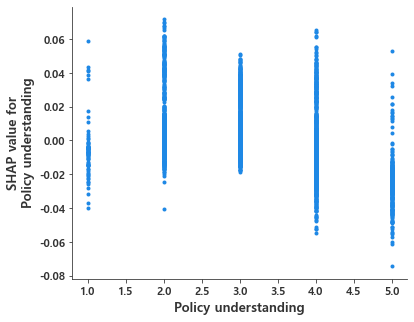

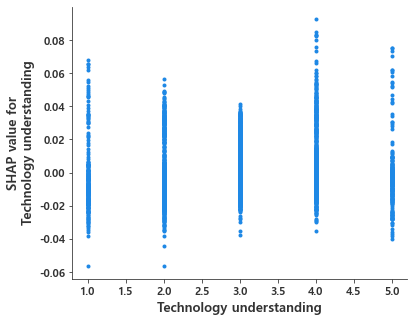

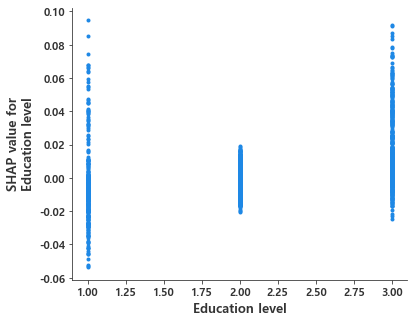

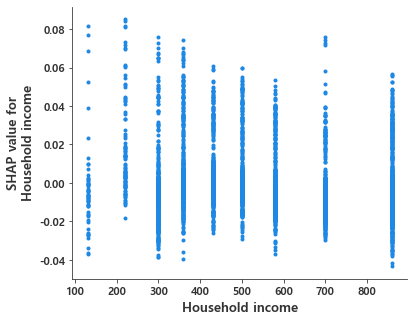

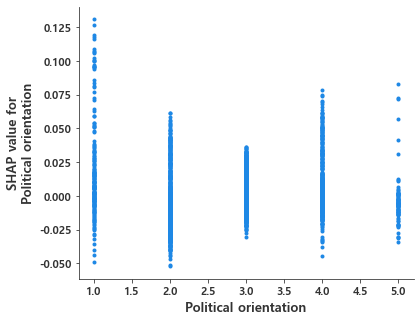

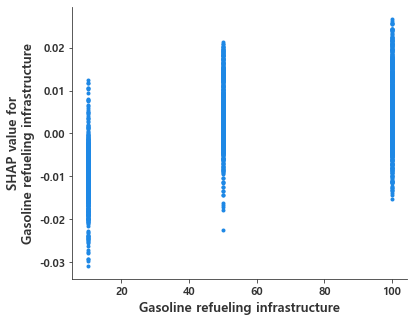

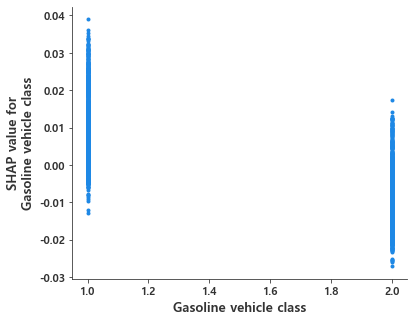

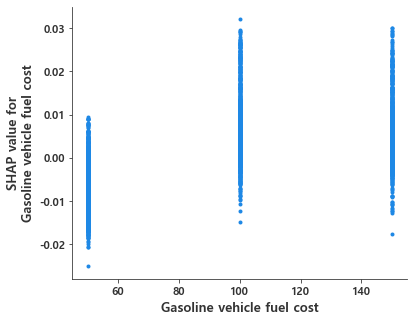

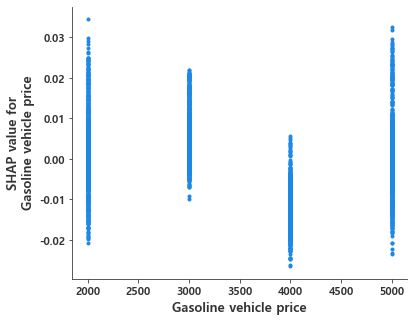

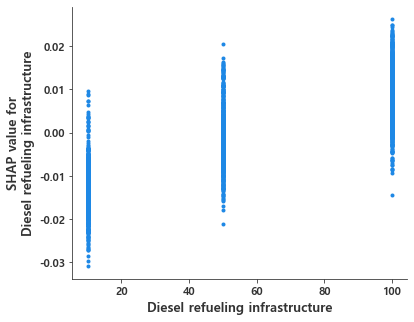

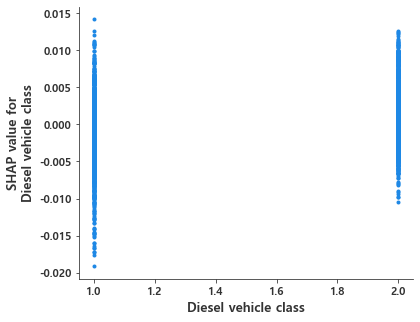

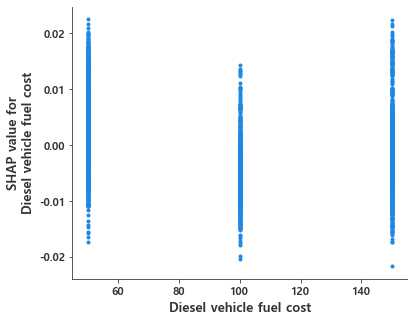

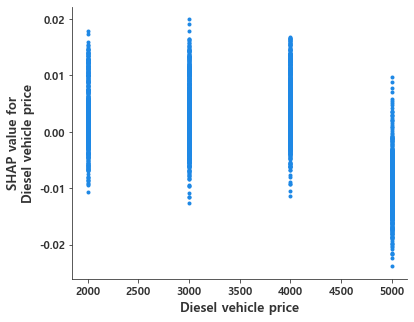

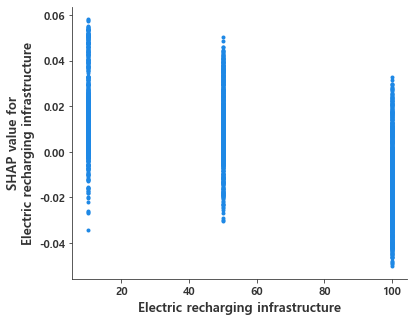

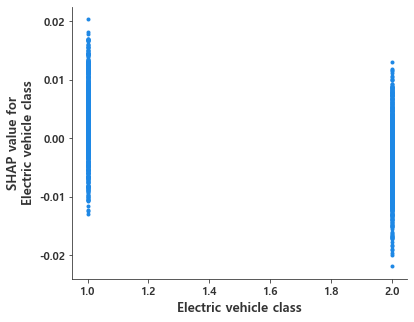

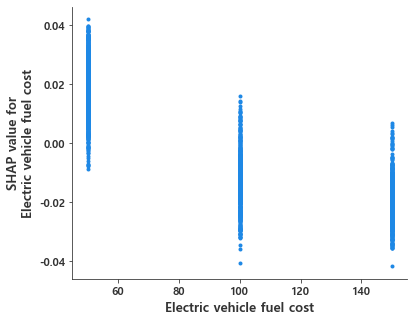

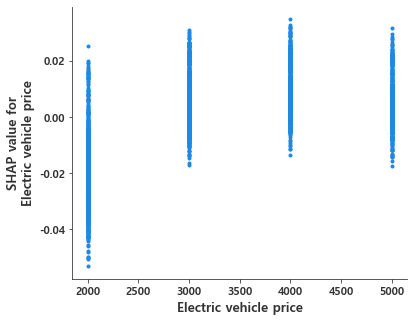

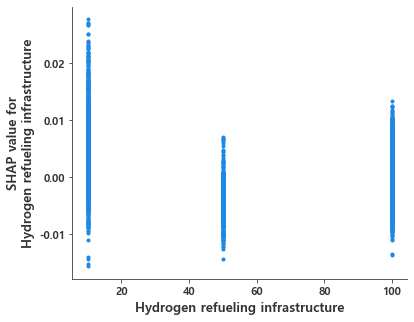

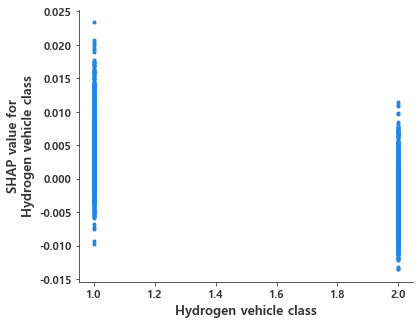

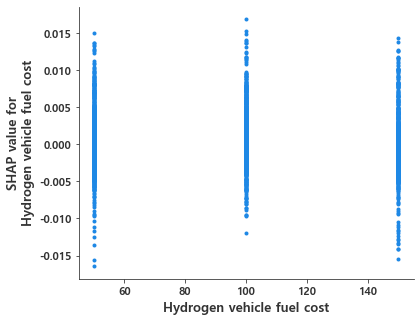

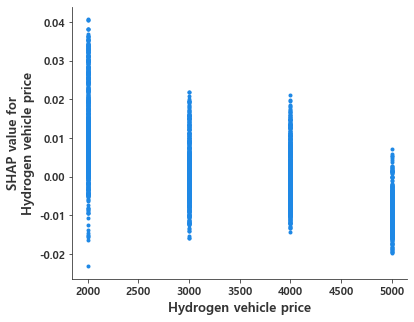

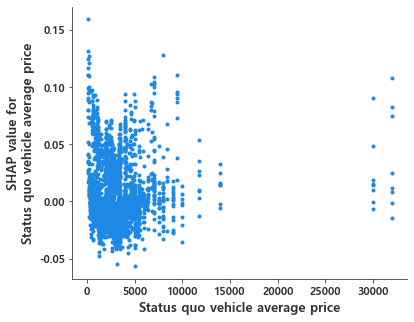

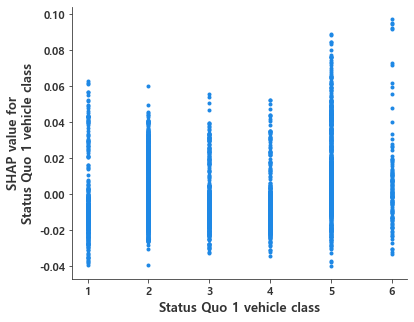

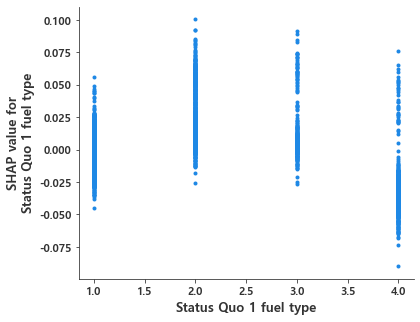

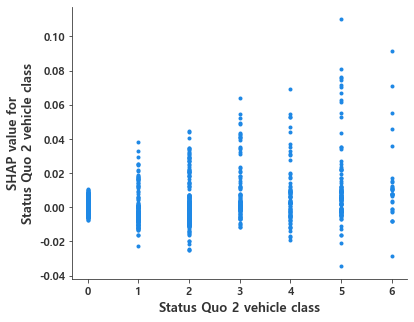

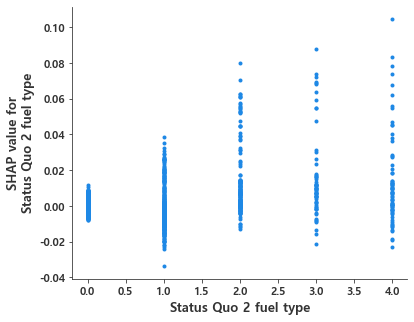

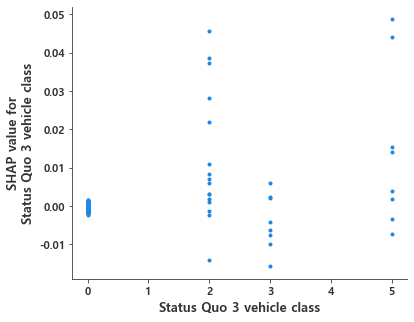

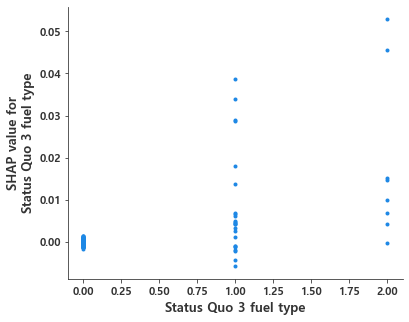

In [12]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[1],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Electric

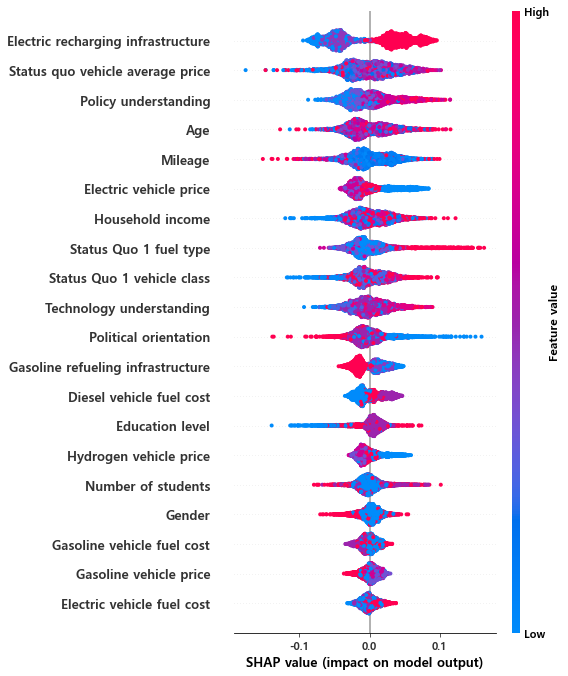

In [13]:
shap.summary_plot(shap_values[2],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

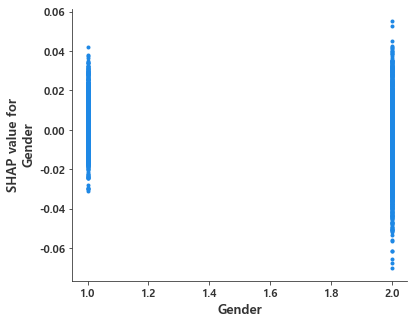

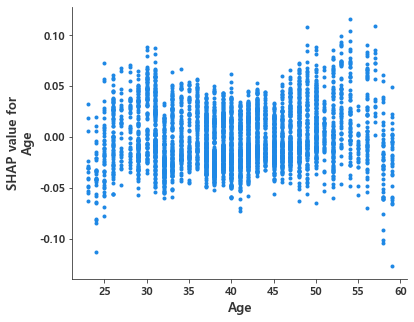

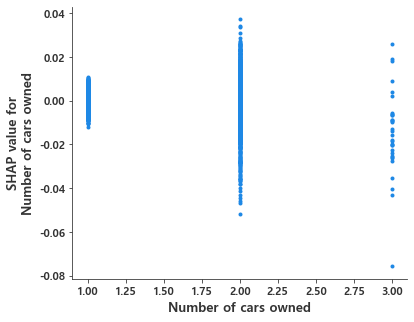

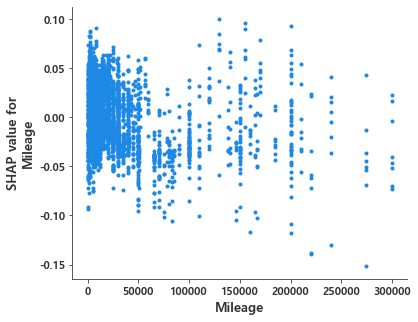

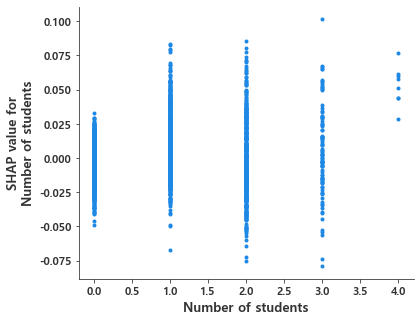

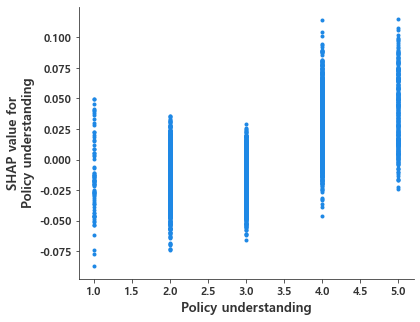

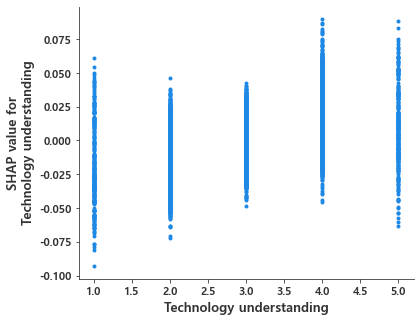

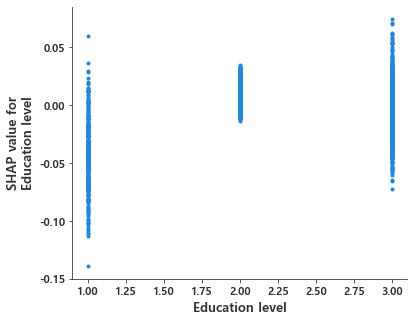

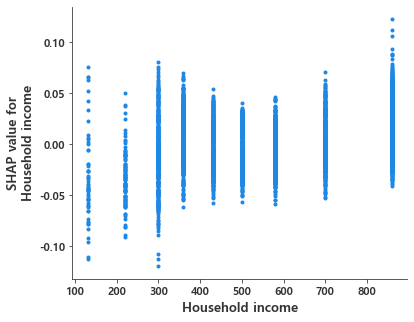

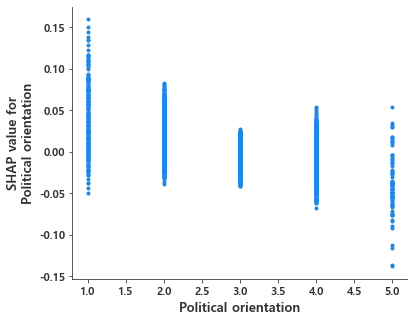

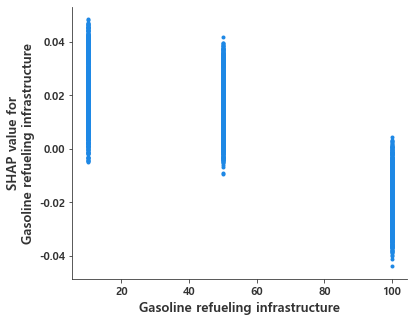

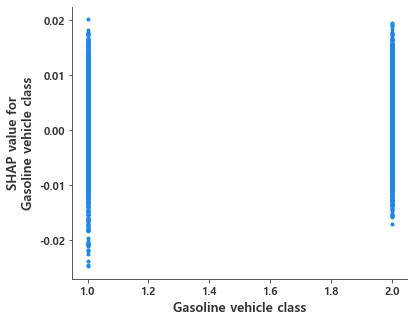

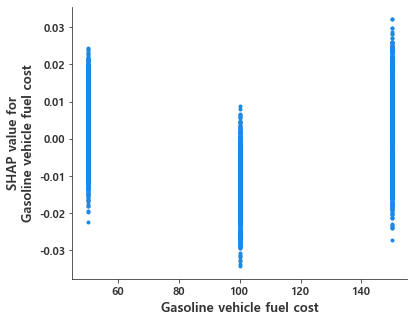

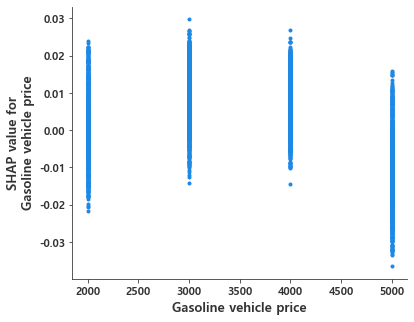

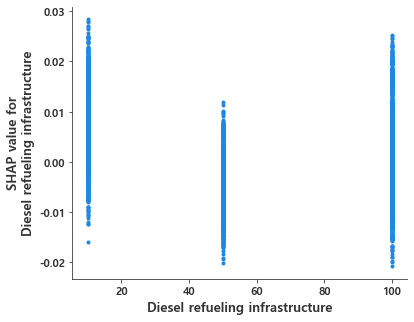

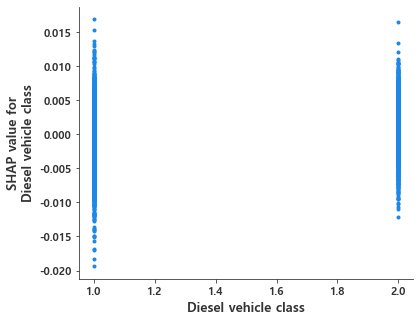

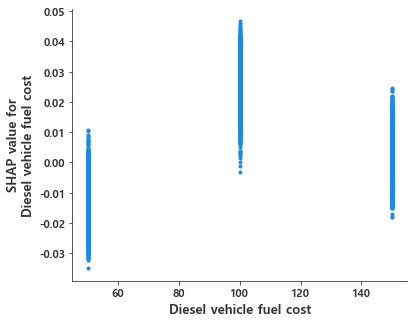

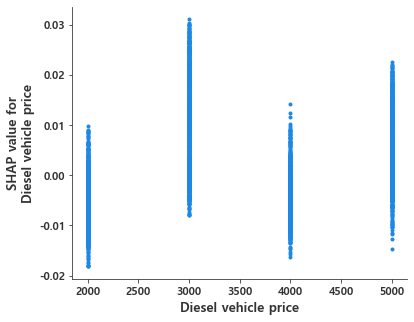

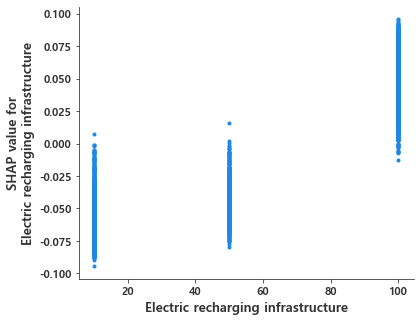

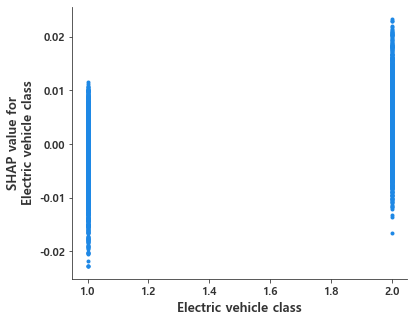

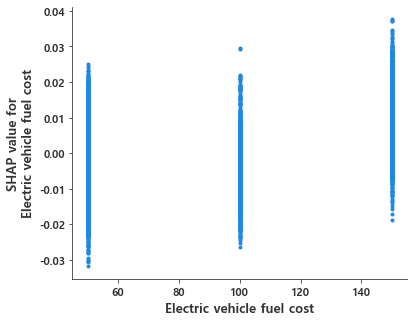

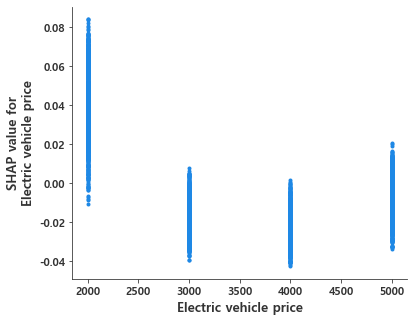

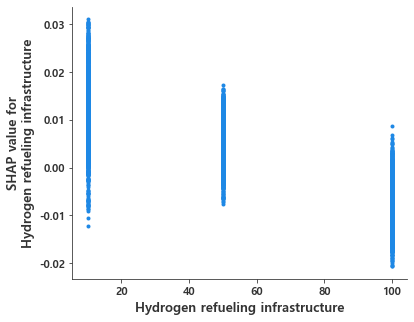

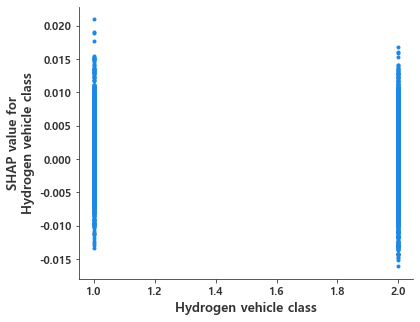

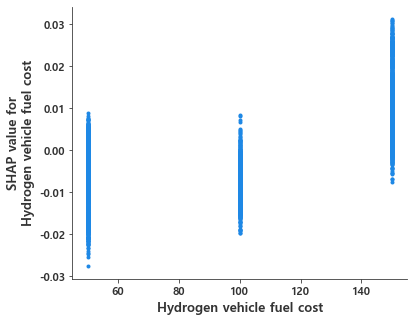

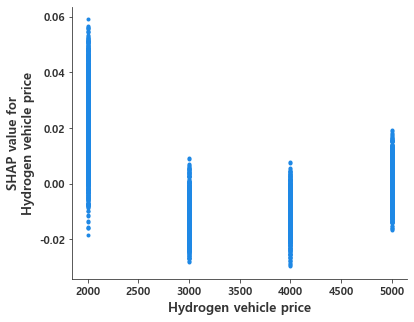

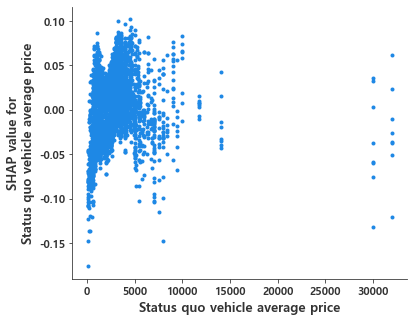

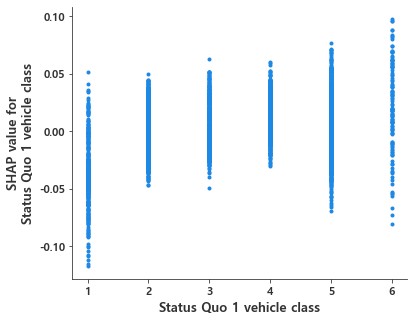

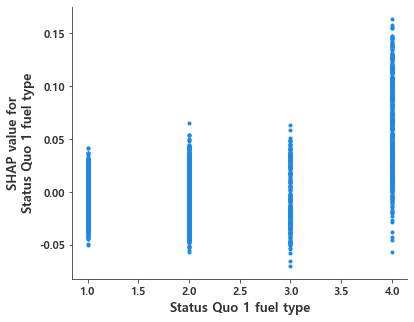

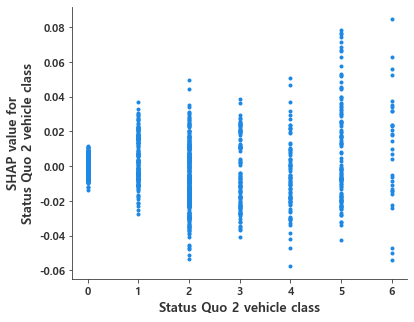

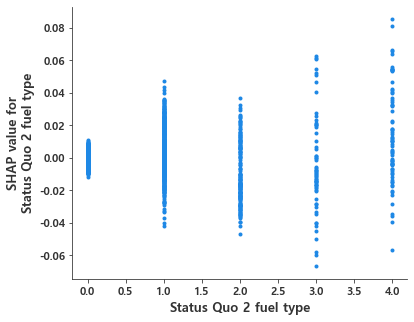

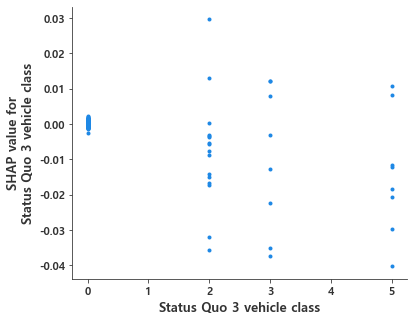

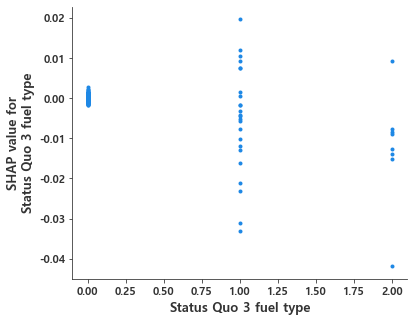

In [14]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[2],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Hydrogen

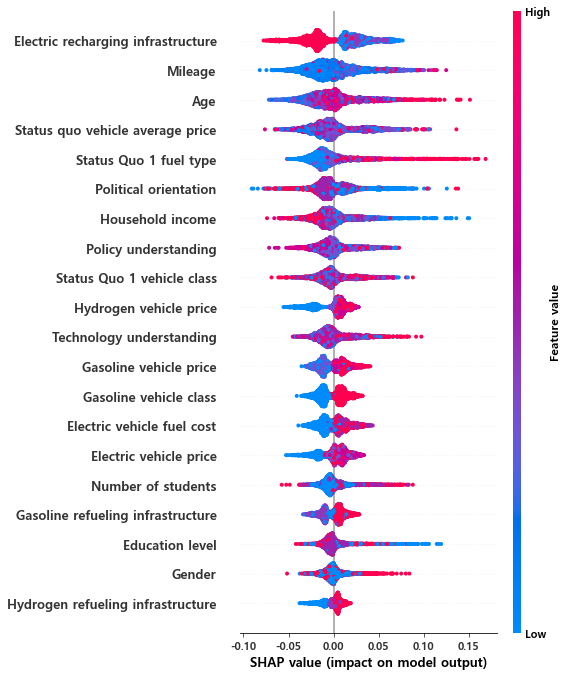

In [15]:
shap.summary_plot(shap_values[3],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

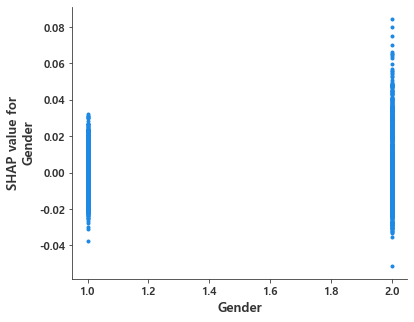

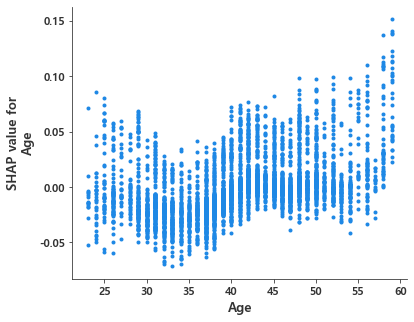

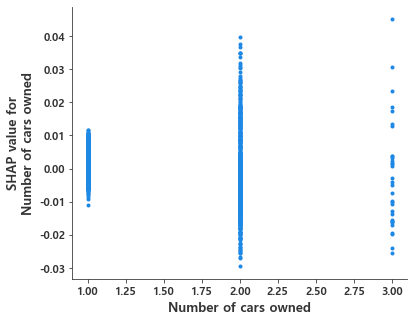

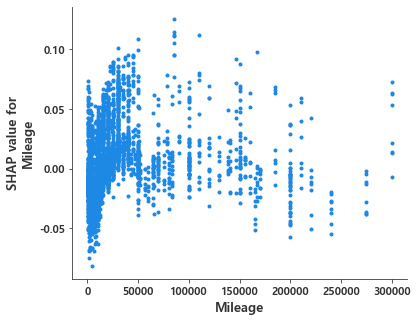

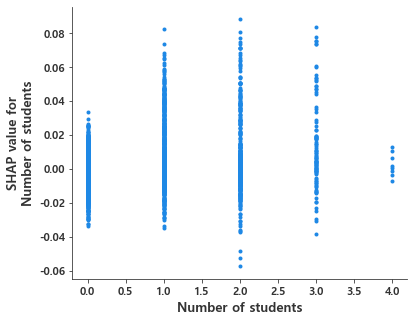

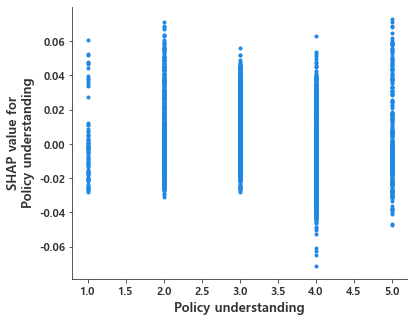

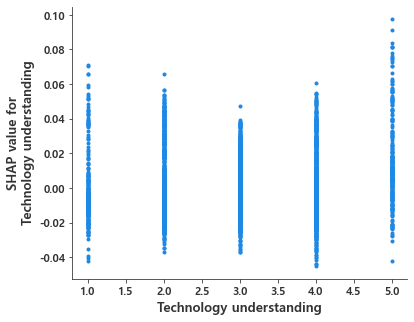

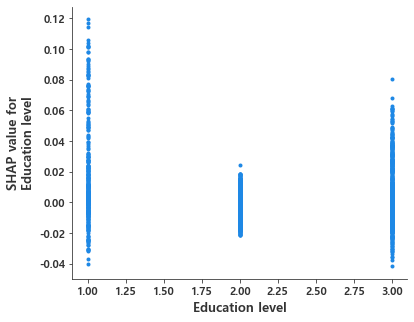

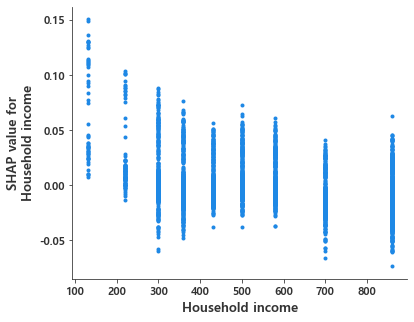

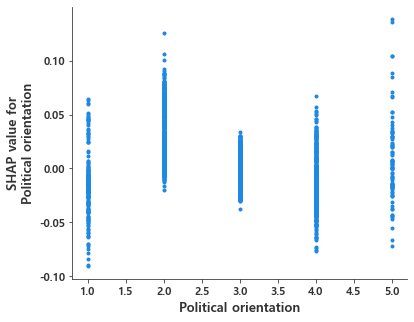

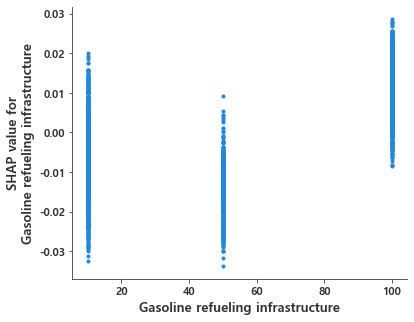

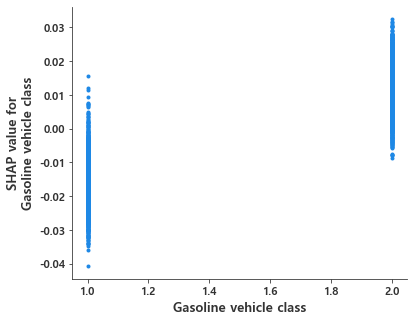

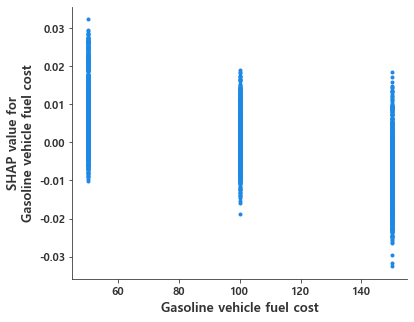

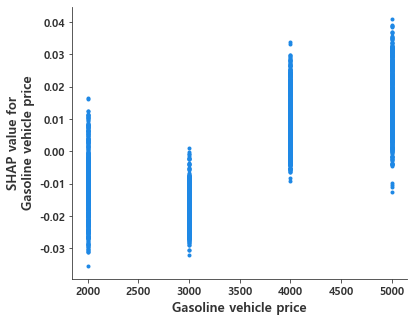

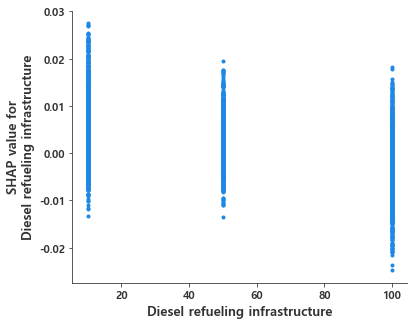

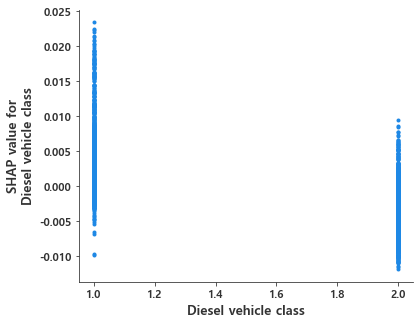

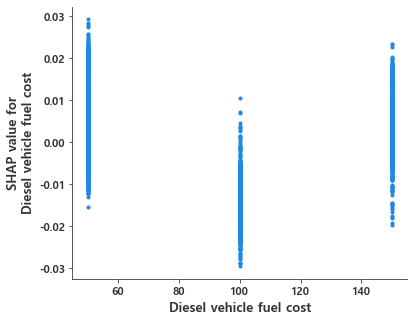

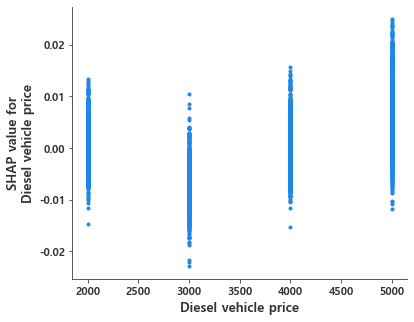

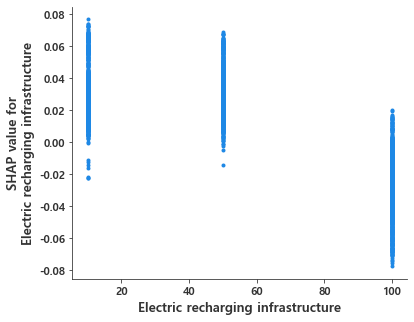

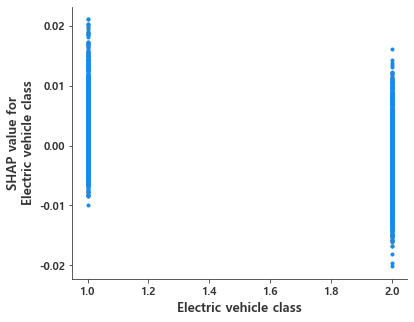

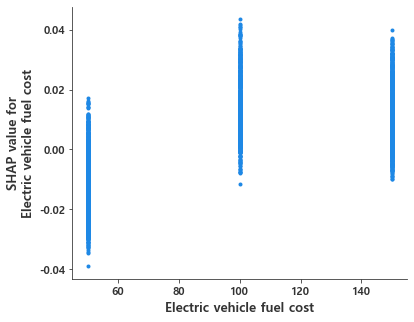

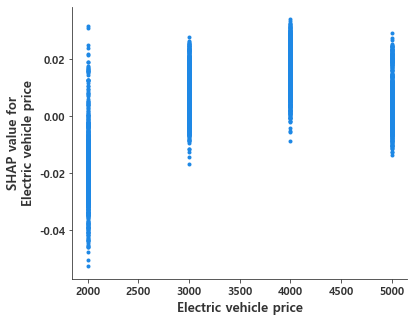

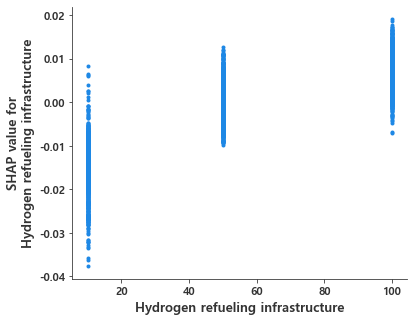

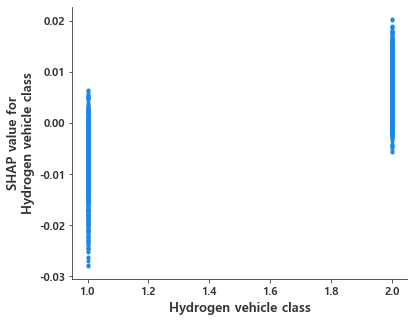

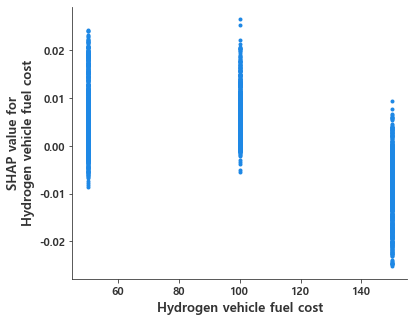

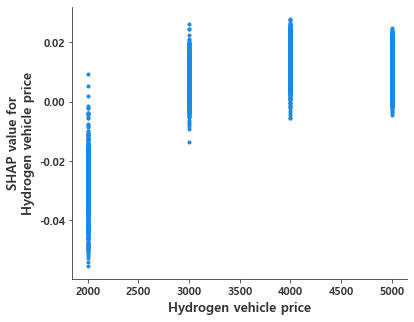

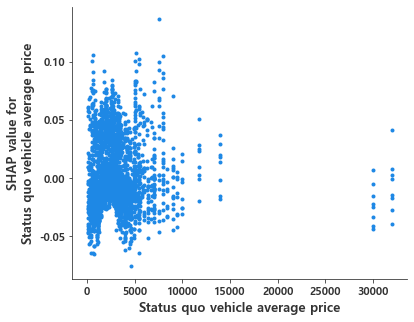

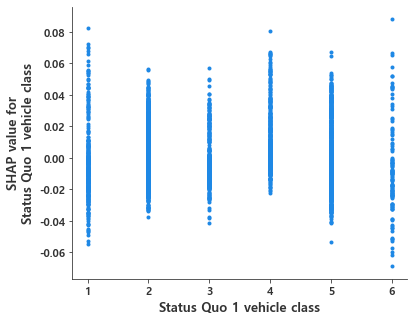

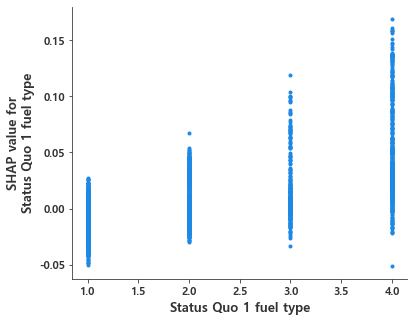

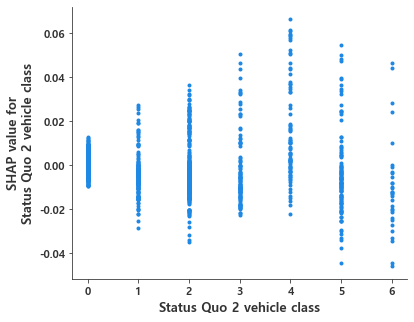

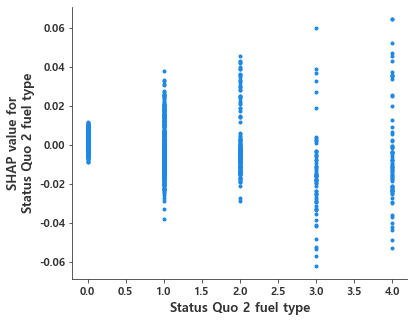

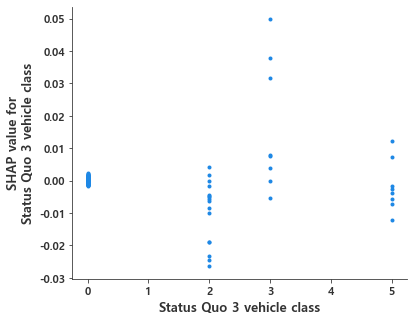

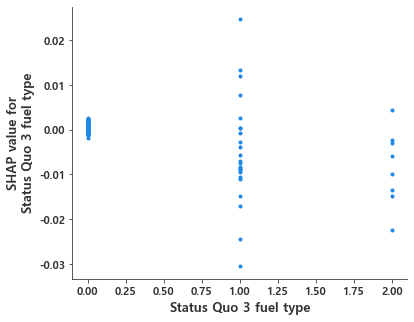

In [16]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[3],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

In [17]:
# for i in range(0,33,1):
#     shap.dependence_plot(i,
#                      shap_values[0],x.values,
#                      feature_names=x.columns,
#                     interaction_index="연평균주행거리")

In [18]:
# result_gasoline = pd.DataFrame(shap_values[0])
# result_gasoline.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_gasoline.csv")

# result_diesel = pd.DataFrame(shap_values[1])
# result_diesel.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_diesel.csv")

# result_electric = pd.DataFrame(shap_values[2])
# result_electric.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_electric.csv")

# result_hydrogen = pd.DataFrame(shap_values[3])
# result_hydrogen.to_csv("G:\\내 드라이브\\내 모든 파일들\\2_연구\\1_졸업논문\\Codes\\result_hydrogen.csv")

In [19]:
# Import data

bargraph = pd.read_excel("bargraph.xlsx")
bargraph.head()

,feature,gasoline,diesel,electric,hydrogen,Unnamed: 5,feature.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,feature.3,Unnamed: 15,Unnamed: 16,Unnamed: 17,feature.4,Unnamed: 19,Unnamed: 20
0,Diesel vehicle class,9.979912,10.488071,12.960230,13.856918,NaN,Status Quo 3 vehicle class,0.000184,4.455051e-08,NaN,...,0.000285,6.905458e-08,NaN,Status Quo 3 fuel type,0.000255,6.177868e-08,NaN,Status Quo 3 vehicle class,0.000214,5.179279e-08
1,Electric vehicle class,13.951241,14.917693,23.094930,18.769136,NaN,Status Quo 3 fuel type,0.000189,4.590004e-08,NaN,...,0.000290,7.032317e-08,NaN,Status Quo 3 vehicle class,0.000309,7.480800e-08,NaN,Status Quo 3 fuel type,0.000220,5.340306e-08
2,Gasoline vehicle class,24.365023,34.651418,22.532921,49.690802,NaN,Diesel vehicle class,0.002418,5.856624e-07,NaN,...,0.002197,5.322490e-07,NaN,Diesel vehicle class,0.003140,7.605597e-07,NaN,Number of cars owned,0.003331,8.069968e-07
3,Hydrogen vehicle class,12.818171,15.699872,16.702497,26.814283,NaN,Hydrogen vehicle fuel cost,0.002891,7.002649e-07,NaN,...,0.002541,6.154833e-07,NaN,Hydrogen vehicle class,0.004046,9.801714e-07,NaN,Diesel vehicle class,0.003357,8.131811e-07
4,Diesel vehicle fuel cost,33.397385,20.465509,61.068935,29.361742,NaN,Hydrogen vehicle class,0.003105,7.522231e-07,NaN,...,0.002853,6.910731e-07,NaN,Number of cars owned,0.004520,1.094932e-06,NaN,Status Quo 2 fuel type,0.003897,9.440606e-07


In [20]:
plt.barh()

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

In [ ]:
bargraph["gasoline"].sort_values().plot(
    kind="barh",
    figsize=(10,20),
    grid=False,
    title="Shap values of each feature for the choice of gasoline",
    y=bargraph["feature"]
)

In [ ]:
shap_g = bargraph['gasoline']
g = bargraph['g']
shap_d = bargraph['diesel']
d = bargraph['d']
shap_e = bargraph['electric']
e = bargraph['e']
shap_h = bargraph['hydrogen']
h = bargraph['h']

In [ ]:


plt.figure(figsize=(10,20))
plt.barh(g,shap_g)

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(d,shap_d).invert_yaxis()

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(e,shap_e)

In [ ]:
plt.figure(figsize=(10,20))
plt.barh(h,shap_h)